# Bank Customer Churn Prediction

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,roc_curve,roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree, export_text
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

# Data Preprocessing, EDA, Standard Scaling and Label Encoding

In [83]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")

df = pd.DataFrame(data)
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [85]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [86]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [87]:
df = df.drop('customer_id',axis=1)

In [88]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### France : 0
### Germany : 1
### Spain : 2

### Male : 1
### Female : 0

In [89]:
label_encoder = LabelEncoder()
df['country'] = label_encoder.fit_transform(df['country'])
print(df['country'])

df['gender'] = label_encoder.fit_transform(df['gender'])
print(df['gender'])

0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: country, Length: 10000, dtype: int32
0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: gender, Length: 10000, dtype: int32


We are having tenure and balance zero in some of the rows, so we have to replace with median values

In [90]:
def changeZeroToItsMedian(data,cols):
    data[cols] = data[cols].replace(0,data[cols].median())

cols_having_zero_values = ["tenure","balance"]

for i in cols_having_zero_values : 
    changeZeroToItsMedian(df,i)

In [91]:
zero_count = (df == 0).sum()
print(zero_count)

credit_score           0
country             5014
gender              4543
age                    0
tenure                 0
balance                0
products_number        0
credit_card         2945
active_member       4849
estimated_salary       0
churn               7963
dtype: int64


In [92]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,97198.54,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,97198.54,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,97198.54,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,97198.54,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [93]:
cols_for_scaling = ['credit_score','age','tenure','balance','products_number','estimated_salary']

In [94]:
cols_for_sc = df[cols_for_scaling]

In [95]:
cols_for_sc

,credit_score,age,tenure,balance,products_number,estimated_salary
0,619,42,2,97198.54,1,101348.88
1,608,41,1,83807.86,1,112542.58
2,502,42,8,159660.80,3,113931.57
3,699,39,1,97198.54,2,93826.63
4,850,43,2,125510.82,1,79084.10
...,...,...,...,...,...,...
9995,771,39,5,97198.54,2,96270.64
9996,516,35,10,57369.61,1,101699.77
9997,709,36,7,97198.54,1,42085.58
9998,772,42,3,75075.31,2,92888.52


In [96]:
scaler = StandardScaler()
X1 = scaler.fit_transform(cols_for_sc)

In [97]:
import joblib
joblib.dump(scaler,'scalerf.pkl')

['scalerf.pkl']

In [98]:
X1

array([[-0.32622142,  0.29351742, -1.19287282, -0.54740291, -0.91158349,
         0.02188649],
       [-0.44003595,  0.19816383, -1.56341078, -1.05488465, -0.91158349,
         0.21653375],
       [-1.53679418,  0.29351742,  1.03035488,  1.81979995,  2.52705662,
         0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.65981693, -0.54740291, -0.91158349,
        -1.00864308],
       [ 1.25683526,  0.29351742, -0.82233487, -1.38583196,  0.80773656,
        -0.12523071],
       [ 1.46377078, -1.04143285, -0.45179692,  0.70112256, -0.91158349,
        -1.07636976]])

In [99]:
df['credit_score'] = X1[:,0]
df['age'] = X1[:,1]
df['tenure'] = X1[:,2]
df['balance'] = X1[:,3]
df['products_number'] = X1[:,4]
df['estimated_salary'] = X1[:,5]

In [100]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,-0.326221,0,0,0.293517,-1.192873,-0.547403,-0.911583,1,1,0.021886,1
1,-0.440036,2,0,0.198164,-1.563411,-1.054885,-0.911583,0,1,0.216534,0
2,-1.536794,0,0,0.293517,1.030355,1.819800,2.527057,1,0,0.240687,1
3,0.501521,0,0,0.007457,-1.563411,-0.547403,0.807737,0,0,-0.108918,0
4,2.063884,2,0,0.388871,-1.192873,0.525580,-0.911583,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0,1,0.007457,-0.081259,-0.547403,0.807737,1,0,-0.066419,0
9996,-1.391939,0,1,-0.373958,1.771431,-2.056845,-0.911583,1,1,0.027988,0
9997,0.604988,0,0,-0.278604,0.659817,-0.547403,-0.911583,0,1,-1.008643,1
9998,1.256835,1,1,0.293517,-0.822335,-1.385832,0.807737,1,0,-0.125231,1


In [101]:
correlation = df.corr()
correlation['churn'].sort_values()

active_member      -0.156128
gender             -0.106512
products_number    -0.047820
credit_score       -0.027094
tenure             -0.010002
credit_card        -0.007138
estimated_salary    0.012097
country             0.035943
balance             0.063718
age                 0.285323
churn               1.000000
Name: churn, dtype: float64

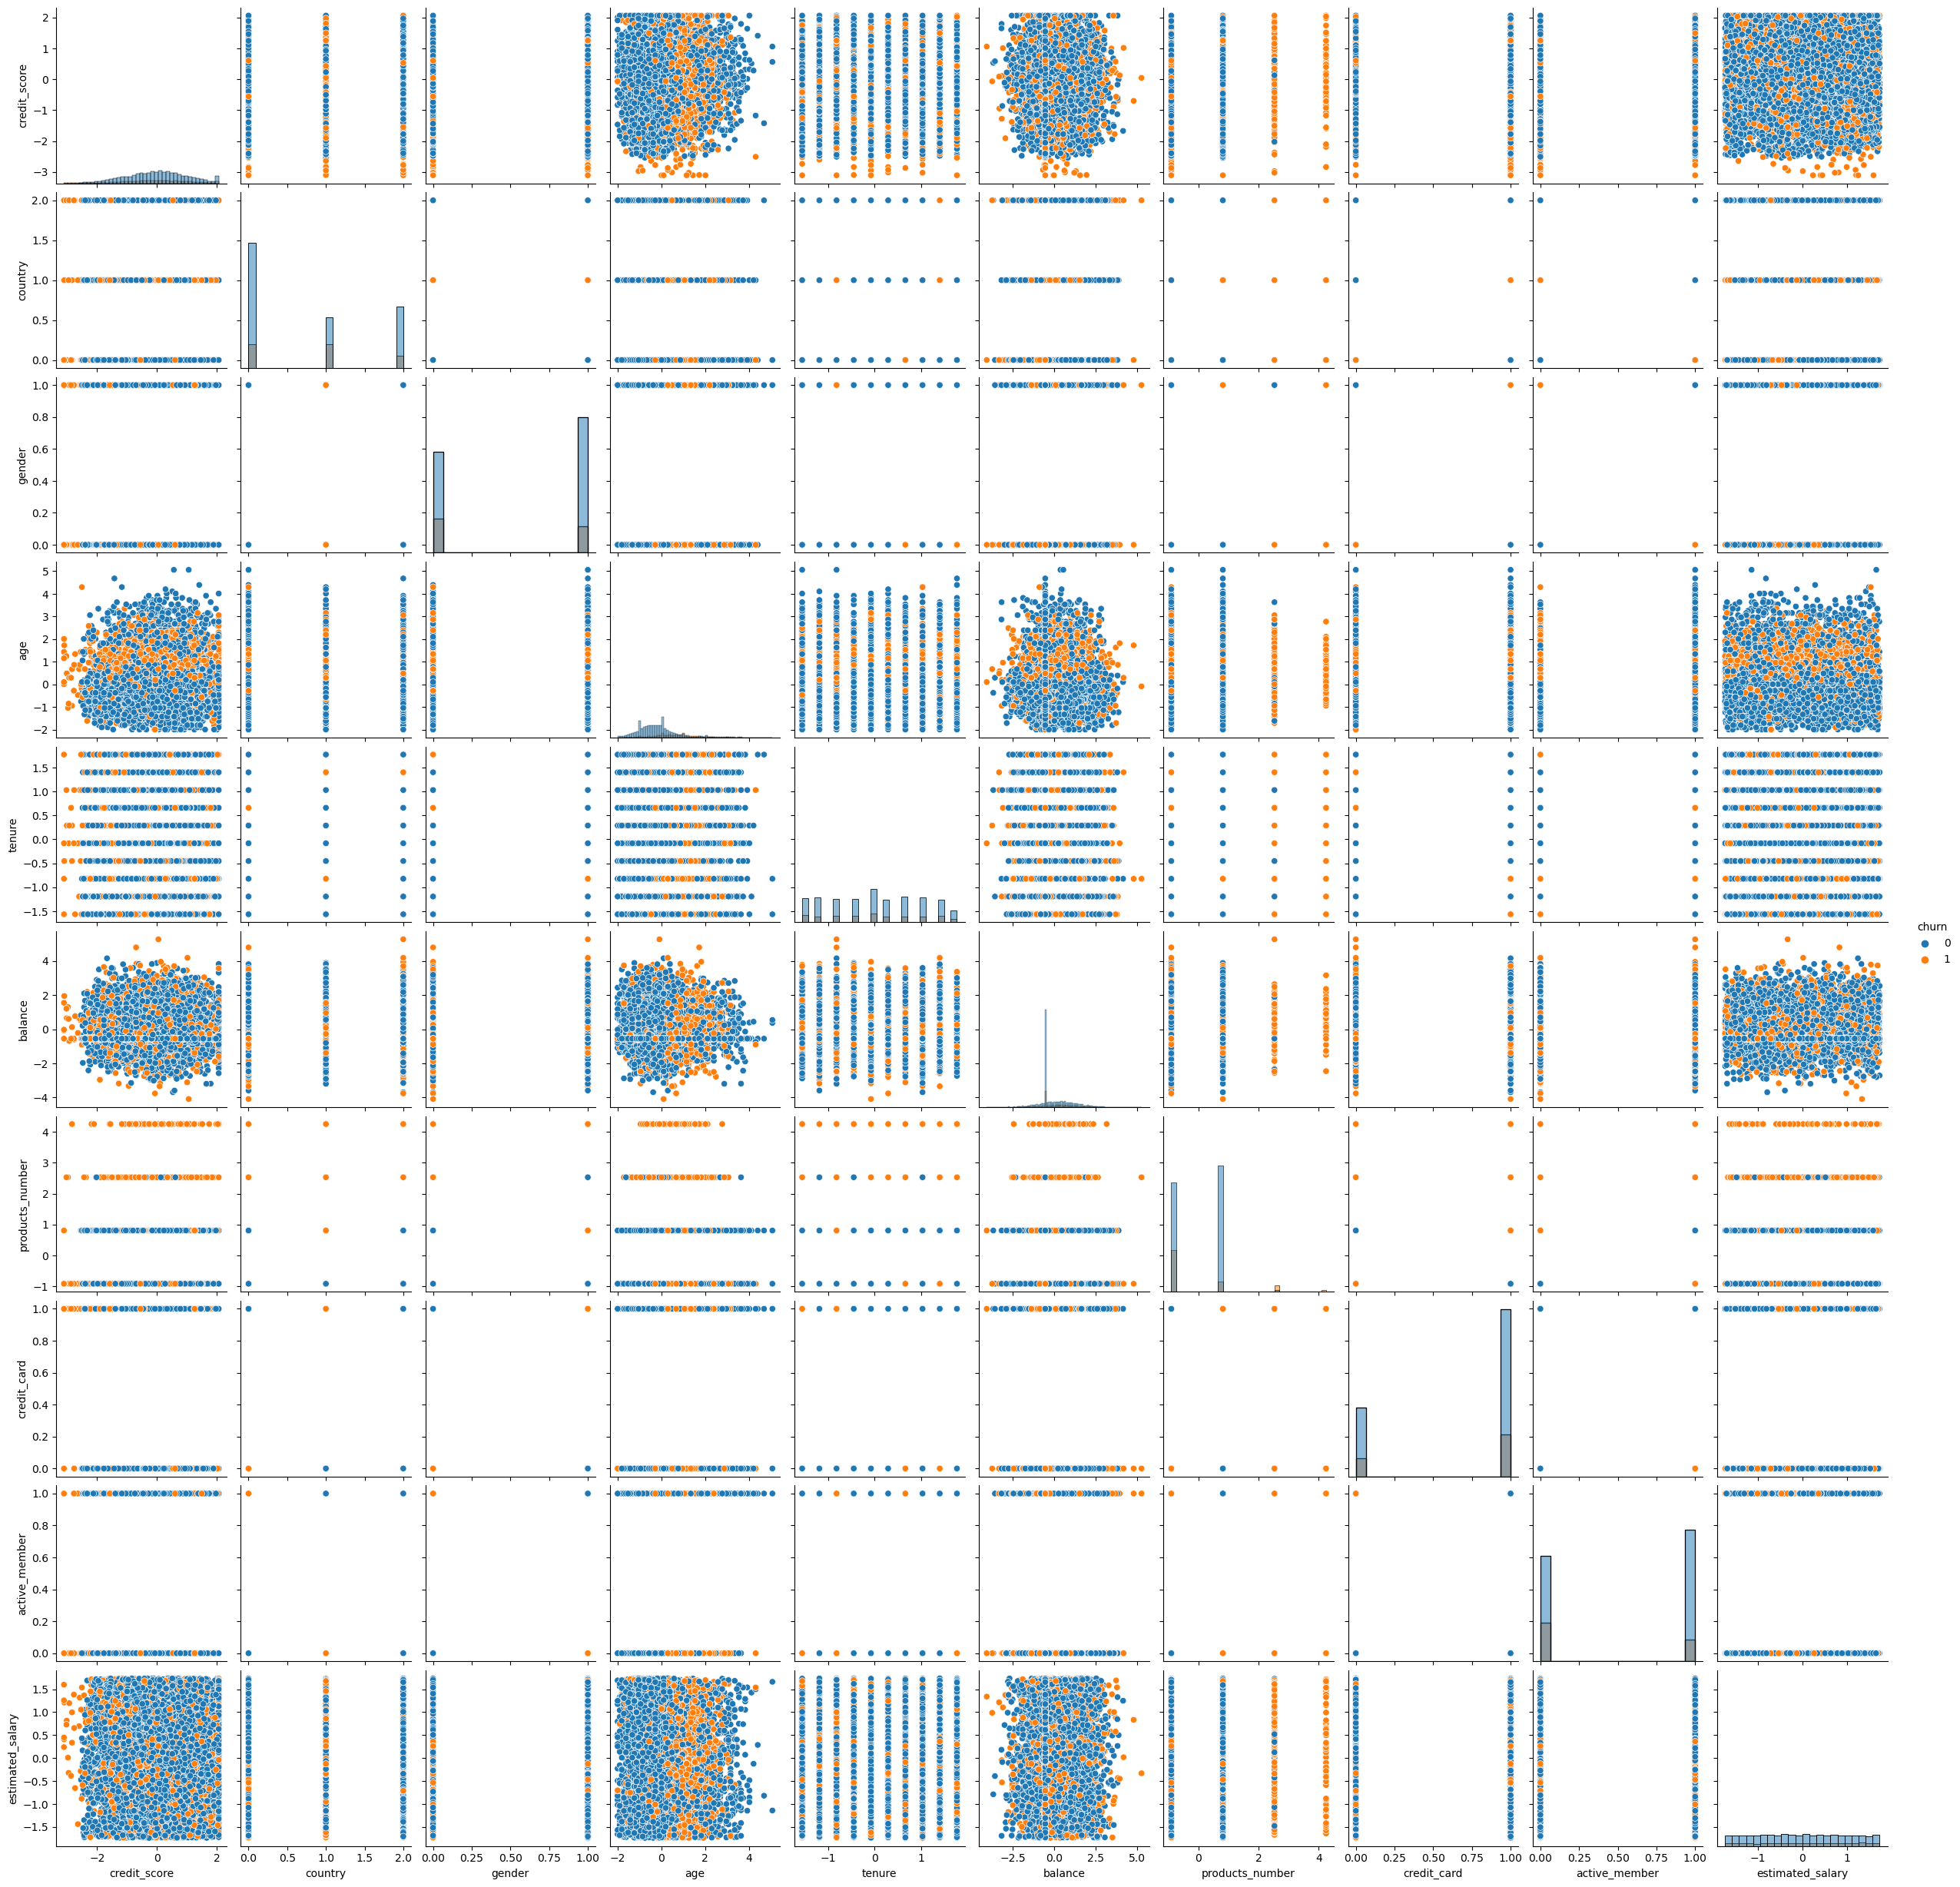

In [32]:
sns.pairplot(df, hue='churn', diag_kind='hist')

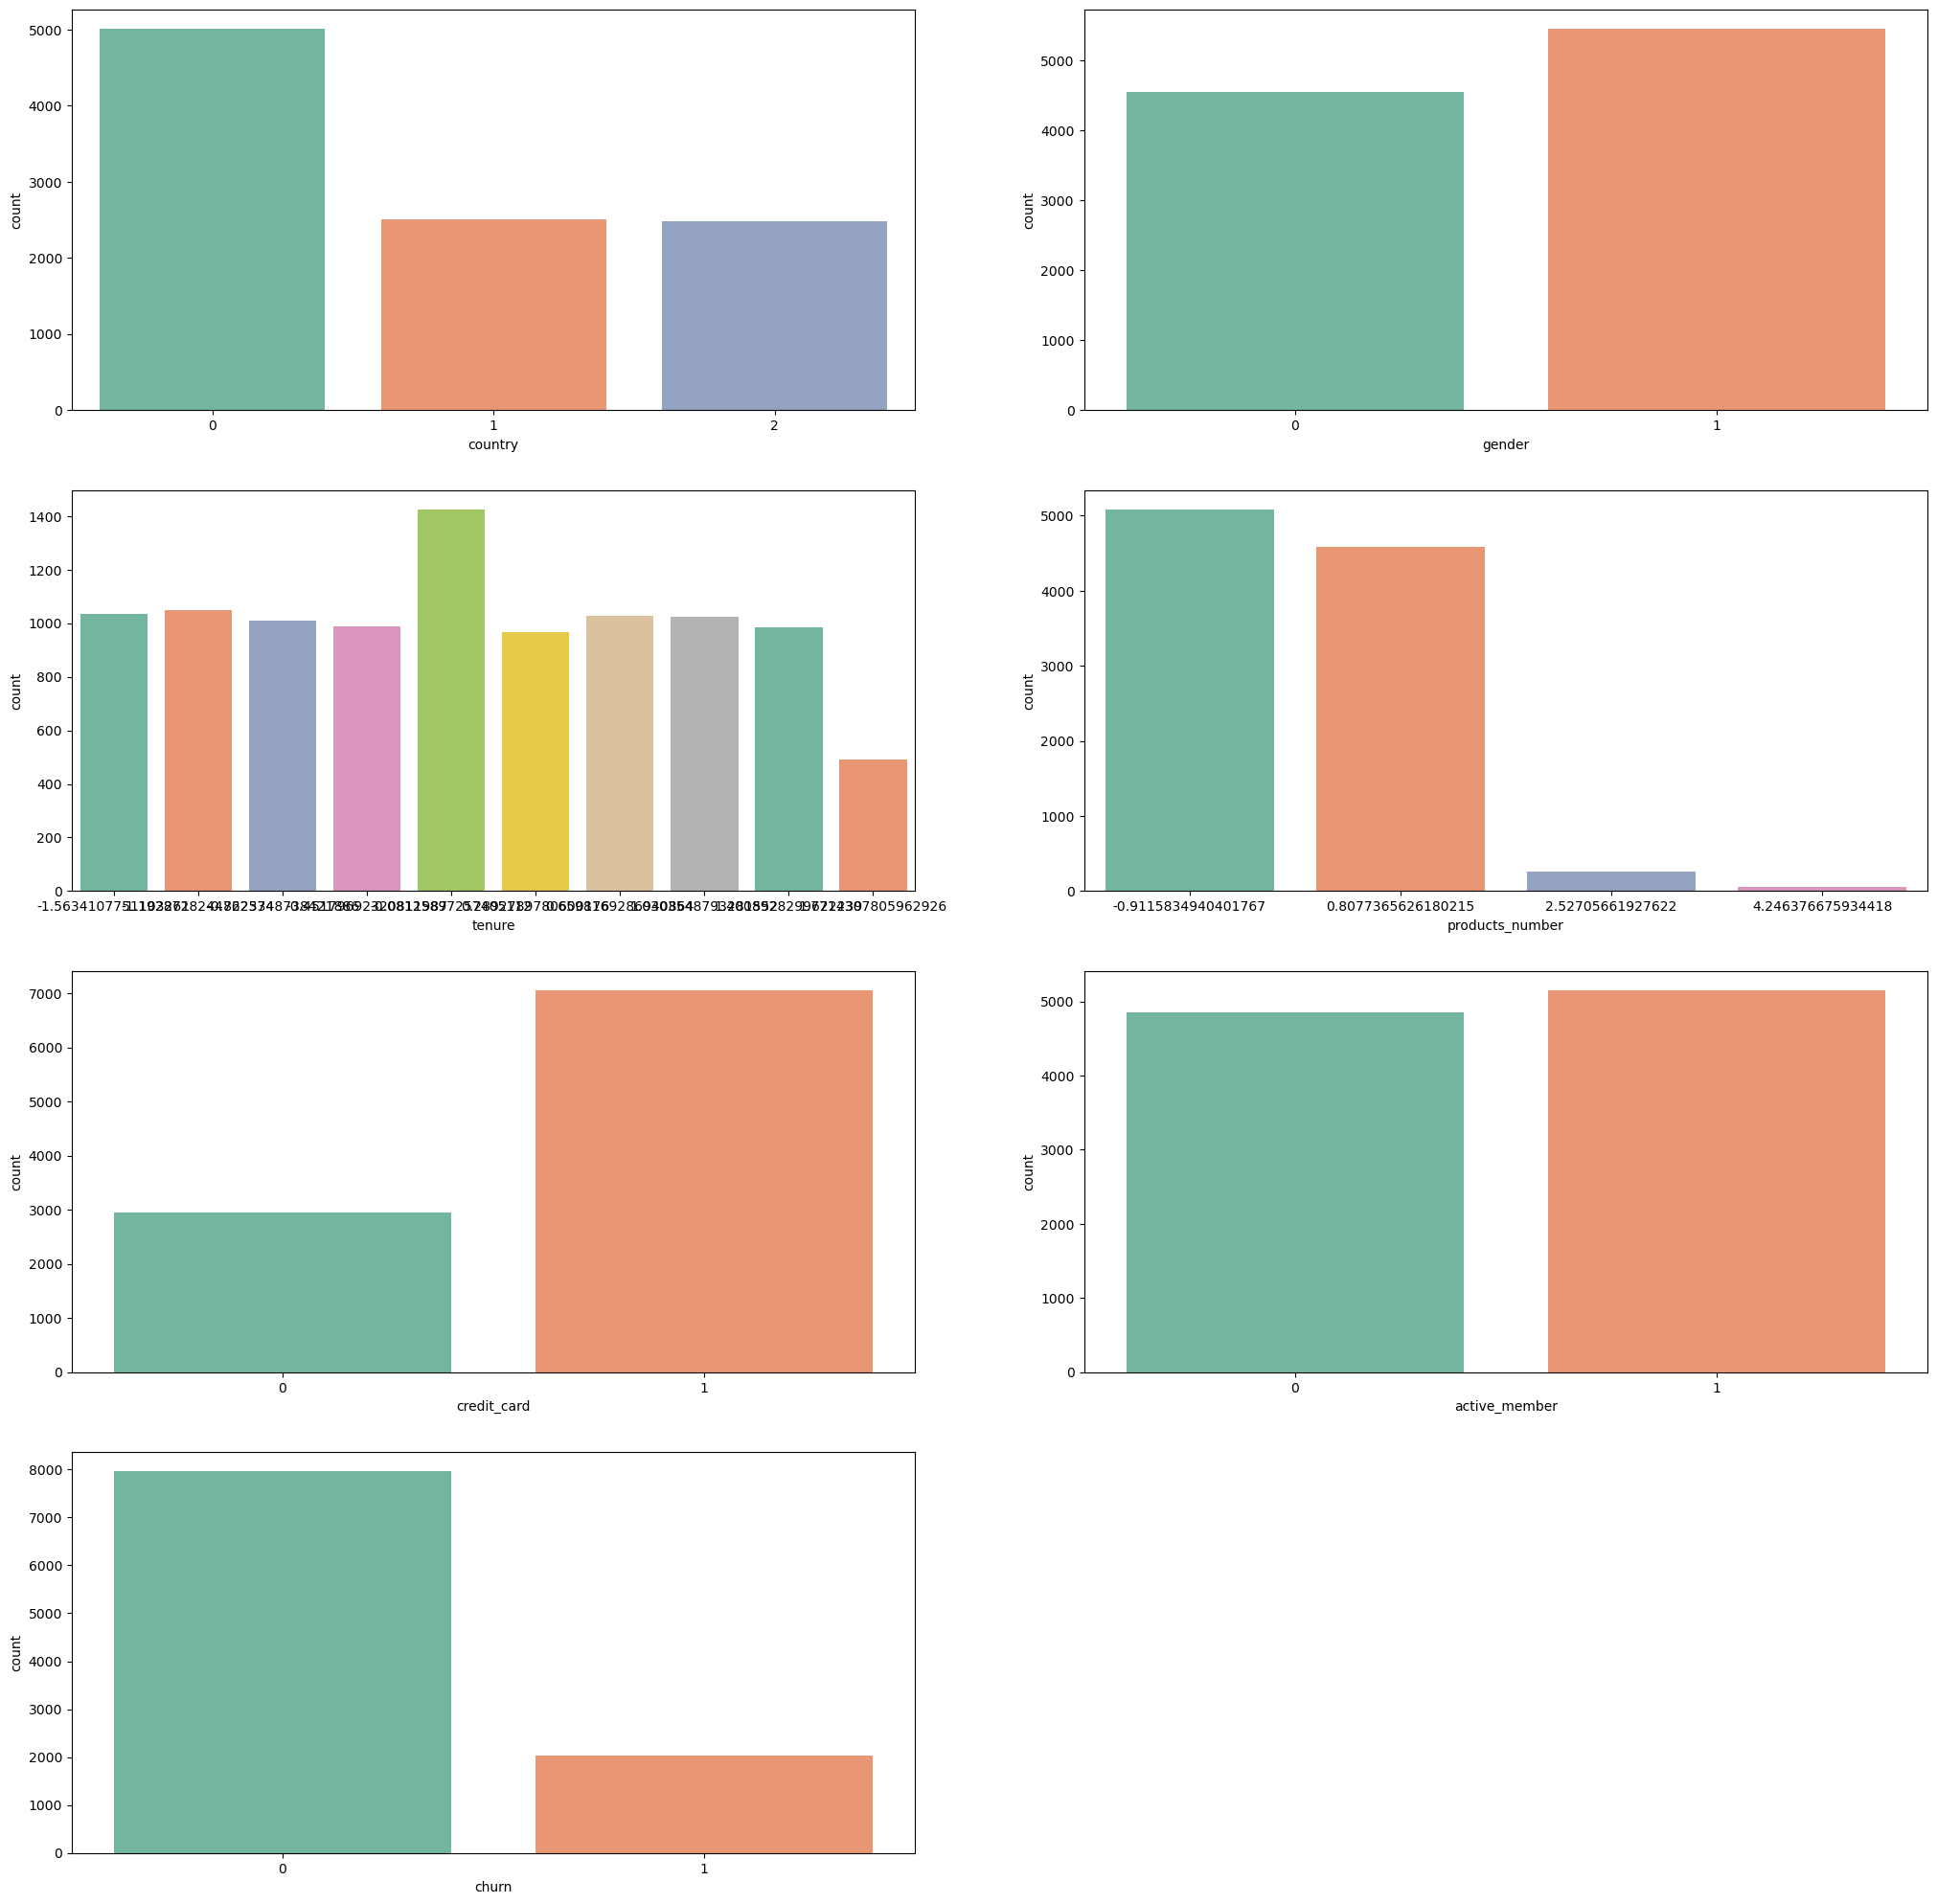

In [33]:
plt.figure(figsize = (25,25))

plt.subplot(4,2,1)
sns.countplot(x = 'country', palette='Set2', data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'gender', palette='Set2', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'tenure', palette='Set2', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'products_number', palette='Set2', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'credit_card', palette='Set2', data = df)

plt.subplot(4,2,6)
sns.countplot(x = 'active_member', palette='Set2', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'churn', palette='Set2', data = df)
plt.show()

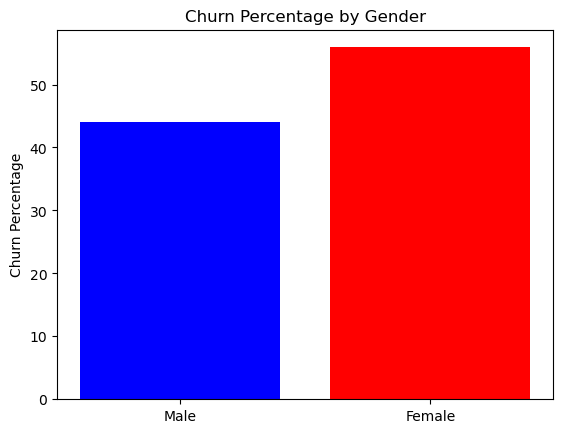

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
# Calculate necessary values
total_customers = df['gender'].value_counts()
male_customers = len(df[df['gender'] == 1])
female_customers = len(df[df['gender'] == 0])

churned_males = len(df[(df['gender'] == 1) & (df['churn'] == 1)])
churned_females = len(df[(df['gender'] == 0) & (df['churn'] == 1)])

total_churned = len(df[df['churn'] == 1])

# Calculate percentages
percent_churned_males = (churned_males / total_churned) * 100
percent_churned_females = (churned_females / total_churned) * 100

# Plotting
fig, ax = plt.subplots()
genders = ['Male', 'Female']
churn_percentages = [percent_churned_males, percent_churned_females]

ax.bar(genders, churn_percentages, color=['blue', 'red'])
ax.set_ylabel('Churn Percentage')
ax.set_title('Churn Percentage by Gender')
plt.show()


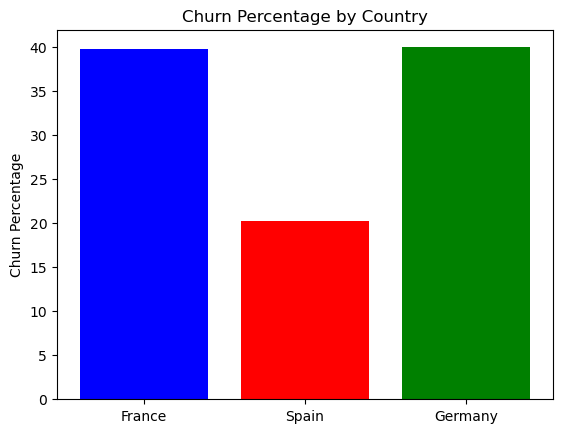

In [106]:
# Calculate necessary values
total_customers = df['country'].value_counts()
france_customers = len(df[df['country'] == 0])
spain_customers = len(df[df['country'] == 2])
germany_customers = len(df[df['country'] == 1])

churned_france = len(df[(df['country'] == 0) & (df['churn'] == 1)])
churned_spain = len(df[(df['country'] == 2) & (df['churn'] == 1)])
churned_germany = len(df[(df['country'] == 1) & (df['churn'] == 1)])

total_churned = len(df[df['churn'] == 1])

# Calculate percentages
percent_churned_france = (churned_france / total_churned) * 100
percent_churned_spain = (churned_spain / total_churned) * 100
percent_churned_germany = (churned_germany / total_churned) * 100

# Plotting
fig, ax = plt.subplots()
countries = ['France', 'Spain', 'Germany']
churn_percentages = [percent_churned_france, percent_churned_spain, percent_churned_germany]

ax.bar(countries, churn_percentages, color=['blue', 'red', 'green'])
ax.set_ylabel('Churn Percentage')
ax.set_title('Churn Percentage by Country')
plt.show()


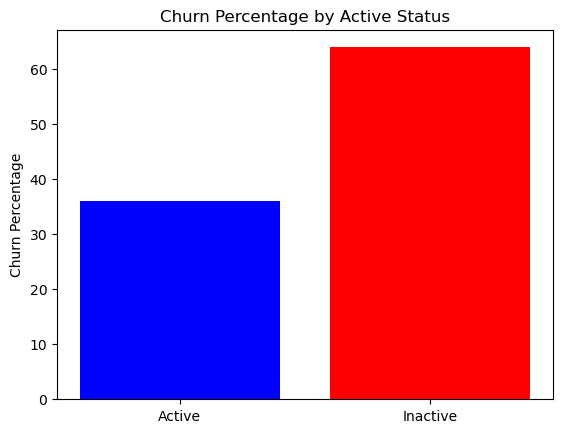

In [107]:
# Calculate necessary values
total_customers = df['active_member'].value_counts()
active_customers = len(df[df['active_member'] == 1])
inactive_customers = len(df[df['active_member'] == 0])

churned_active = len(df[(df['active_member'] == 1) & (df['churn'] == 1)])
churned_inactive = len(df[(df['active_member'] == 0) & (df['churn'] == 1)])

total_churned = len(df[df['churn'] == 1])

# Calculate percentages
percent_churned_active = (churned_active / total_churned) * 100
percent_churned_inactive = (churned_inactive / total_churned) * 100

# Plotting
fig, ax = plt.subplots()
statuses = ['Active', 'Inactive']
churn_percentages = [percent_churned_active, percent_churned_inactive]

ax.bar(statuses, churn_percentages, color=['blue', 'red'])
ax.set_ylabel('Churn Percentage')
ax.set_title('Churn Percentage by Active Status')
plt.show()


In [42]:
X = df.iloc[:,0:10]
y = df.iloc[:,-1]

In [43]:
print("X : ",X)
print("y : ",y)

X :        credit_score  country  gender       age    tenure   balance  \
0        -0.326221        0       0  0.293517 -1.192873 -0.547403   
1        -0.440036        2       0  0.198164 -1.563411 -1.054885   
2        -1.536794        0       0  0.293517  1.030355  1.819800   
3         0.501521        0       0  0.007457 -1.563411 -0.547403   
4         2.063884        2       0  0.388871 -1.192873  0.525580   
...            ...      ...     ...       ...       ...       ...   
9995      1.246488        0       1  0.007457 -0.081259 -0.547403   
9996     -1.391939        0       1 -0.373958  1.771431 -2.056845   
9997      0.604988        0       0 -0.278604  0.659817 -0.547403   
9998      1.256835        1       1  0.293517 -0.822335 -1.385832   
9999      1.463771        0       0 -1.041433 -0.451797  0.701123   

      products_number  credit_card  active_member  estimated_salary  
0           -0.911583            1              1          0.021886  
1           -0.911583     

### Dividing data in training and testing

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.25, random_state = 42,stratify = y)

In [45]:
print("X_train : ",X_train)
print("y_train : ",y_train)
print("X_test : ",X_test)
print("y_test : ",y_test)

X_train :        credit_score  country  gender       age    tenure   balance  \
5866      0.874005        0       0  1.342407  1.030355  0.462462   
1938     -1.371246        0       1 -0.087897 -0.822335 -0.783915   
4194     -0.812520        1       0  1.437761  1.400893 -0.540430   
6332     -0.326221        0       0 -0.373958 -0.451797 -0.804558   
1        -0.440036        2       0  0.198164 -1.563411 -1.054885   
...            ...      ...     ...       ...       ...       ...   
3254     -1.019455        1       1  1.056346 -0.451797  0.361281   
4644      0.636029        2       1  3.344832 -0.081259 -0.547403   
8942      0.170424        0       0 -0.183251  1.400893 -1.510457   
2935      0.377359        2       1 -0.373958  1.030355 -0.403775   
6206      1.567239        2       1  1.151700  0.659817 -0.547403   

      products_number  credit_card  active_member  estimated_salary  
5866         0.807737            0              1          1.223572  
1938        -0.91158

In [46]:
name = []
accuracy = []
precision = []
recall = []
f1 = []

# Logistic Regression

In [47]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)


In [48]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_lr*100,precision_lr*100, recall_lr*100, f1_lr*100]}
df_lr = pd.DataFrame(measure)
df_lr

,Metric,Score
0,Accuracy,80.720000
1,Precision,62.616822
2,Recall,13.163065
3,F1 Score,21.753247


In [49]:
name.append('Logistic Regression')
accuracy.append(accuracy_lr)
precision.append(f1_lr)
recall.append(precision_lr)
f1.append(recall_lr)

In [50]:
print(name,accuracy,precision,recall,f1)

['Logistic Regression'] [0.8072] [0.21753246753246758] [0.6261682242990654] [0.13163064833005894]


# K Nearest Neighbours Classifier

In [52]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [53]:
name.append('KNN')
accuracy.append(accuracy_knn)
precision.append(f1_knn)
recall.append(precision_knn)
f1.append(recall_knn)

In [54]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_knn*100,precision_knn*100, recall_knn*100, f1_knn*100]}
df_knn = pd.DataFrame(measure)
df_knn

,Metric,Score
0,Accuracy,83.320000
1,Precision,63.218391
2,Recall,43.222004
3,F1 Score,51.341890


In [55]:
print(name,accuracy,precision,recall,f1)

['Logistic Regression', 'KNN'] [0.8072, 0.8332] [0.21753246753246758, 0.513418903150525] [0.6261682242990654, 0.632183908045977] [0.13163064833005894, 0.43222003929273084]


# Naive Bayes

In [57]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
y_pred_gnb = model_gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)


In [58]:
name.append('GaussianNB')
accuracy.append(accuracy_gnb)
precision.append(f1_gnb)
recall.append(precision_gnb)
f1.append(recall_gnb)

In [59]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_gnb*100,precision_gnb*100, recall_gnb*100, f1_gnb*100]}
df_gnb = pd.DataFrame(measure)
df_gnb

,Metric,Score
0,Accuracy,82.440000
1,Precision,74.647887
2,Recall,20.825147
3,F1 Score,32.565284


In [60]:
model_bnb = BernoulliNB()
model_bnb.fit(X_train, y_train)
y_pred_bnb = model_bnb.predict(X_test)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
f1_bnb = f1_score(y_test, y_pred_bnb)
precision_bnb = precision_score(y_test, y_pred_bnb)
recall_bnb = recall_score(y_test, y_pred_bnb)

In [61]:
name.append('BernoulliNB')
accuracy.append(accuracy_bnb)
precision.append(f1_bnb)
recall.append(precision_bnb)
f1.append(recall_bnb)

In [62]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_bnb*100,precision_bnb*100, recall_bnb*100, f1_bnb*100]}
df_bnb = pd.DataFrame(measure)
df_bnb

,Metric,Score
0,Accuracy,81.400000
1,Precision,61.702128
2,Recall,22.789784
3,F1 Score,33.285509


In [63]:
print(name,accuracy,precision,recall,f1)

['Logistic Regression', 'KNN', 'GaussianNB', 'BernoulliNB'] [0.8072, 0.8332, 0.8244, 0.814] [0.21753246753246758, 0.513418903150525, 0.3256528417818741, 0.33285509325681495] [0.6261682242990654, 0.632183908045977, 0.7464788732394366, 0.6170212765957447] [0.13163064833005894, 0.43222003929273084, 0.2082514734774067, 0.22789783889980353]


In [64]:
# model_mnb = MultinomialNB()
# model_mnb.fit(X_train, y_train)
# y_pred_mnb = model_mnb.predict(X_test)
# accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
# print(f'Accuracy: {accuracy}')

Multinomial Fails when we gives negative values

# SVC

In [65]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)


In [66]:
name.append('SVC')
accuracy.append(accuracy_svc)
precision.append(f1_svc)
recall.append(precision_svc)
f1.append(recall_svc)

In [67]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_svc*100,precision_svc*100, recall_svc*100, f1_svc*100]}
df_svc = pd.DataFrame(measure)
df_svc

,Metric,Score
0,Accuracy,86.520000
1,Precision,85.537190
2,Recall,40.667976
3,F1 Score,55.126498


In [68]:
print(name,accuracy,precision,recall,f1)

['Logistic Regression', 'KNN', 'GaussianNB', 'BernoulliNB', 'SVC'] [0.8072, 0.8332, 0.8244, 0.814, 0.8652] [0.21753246753246758, 0.513418903150525, 0.3256528417818741, 0.33285509325681495, 0.5512649800266312] [0.6261682242990654, 0.632183908045977, 0.7464788732394366, 0.6170212765957447, 0.8553719008264463] [0.13163064833005894, 0.43222003929273084, 0.2082514734774067, 0.22789783889980353, 0.4066797642436149]


In [69]:
joblib.dump(model_svc,'model_svc.pkl')

['model_svc.pkl']

# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [71]:
# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Define hyperparameters for tuning
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Perform GridSearchCV for hyperparameter tuning
dt_grid = GridSearchCV(dt, param_grid, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

# Evaluate the Decision Tree model
y_pred_dt = best_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)


In [72]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_dt*100,precision_dt*100, recall_dt*100, f1_dt*100]}
df_dt = pd.DataFrame(measure)
df_dt

,Metric,Score
0,Accuracy,83.840000
1,Precision,64.705882
2,Recall,45.383104
3,F1 Score,53.348730


In [73]:
name.append('Decision Tree')
accuracy.append(accuracy_dt)
precision.append(f1_dt)
recall.append(precision_dt)
f1.append(recall_dt)

In [74]:
print(name)
print(accuracy)
print(precision)
print(recall)
print(f1)

['Logistic Regression', 'KNN', 'GaussianNB', 'BernoulliNB', 'SVC', 'Decision Tree']
[0.8072, 0.8332, 0.8244, 0.814, 0.8652, 0.8384]
[0.21753246753246758, 0.513418903150525, 0.3256528417818741, 0.33285509325681495, 0.5512649800266312, 0.5334872979214781]
[0.6261682242990654, 0.632183908045977, 0.7464788732394366, 0.6170212765957447, 0.8553719008264463, 0.6470588235294118]
[0.13163064833005894, 0.43222003929273084, 0.2082514734774067, 0.22789783889980353, 0.4066797642436149, 0.4538310412573674]


In [75]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler


# Create a simple neural network
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (you can adjust epochs, batch_size, etc.)
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the neural network
_, accuracy_nn = model.evaluate(X_test, y_test)
print("Accuracy : ",accuracy_nn)

Epoch 1/100
188/188 [==============================] - 2s 4ms/step - loss: 0.4885 - accuracy: 0.7883 - val_loss: 0.4372 - val_accuracy: 0.8133
Epoch 2/100
188/188 [==============================] - 1s 3ms/step - loss: 0.4302 - accuracy: 0.8112 - val_loss: 0.4101 - val_accuracy: 0.8380
Epoch 3/100
188/188 [==============================] - 1s 3ms/step - loss: 0.4082 - accuracy: 0.8323 - val_loss: 0.3945 - val_accuracy: 0.8447
Epoch 4/100
188/188 [==============================] - 1s 3ms/step - loss: 0.3942 - accuracy: 0.8393 - val_loss: 0.3836 - val_accuracy: 0.8520
Epoch 5/100
188/188 [==============================] - 1s 3ms/step - loss: 0.3855 - accuracy: 0.8405 - val_loss: 0.3758 - val_accuracy: 0.8553
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.3794 - accuracy: 0.8420 - val_loss: 0.3708 - val_accuracy: 0.8533
Epoch 7/100
188/188 [==============================] - 1s 3ms/step - loss: 0.3736 - accuracy: 0.8443 - val_loss: 0.3673 - val_accuracy: 0.8547

Epoch 58/100
188/188 [==============================] - 1s 3ms/step - loss: 0.3263 - accuracy: 0.8670 - val_loss: 0.3404 - val_accuracy: 0.8653
Epoch 59/100
188/188 [==============================] - 1s 3ms/step - loss: 0.3239 - accuracy: 0.8702 - val_loss: 0.3418 - val_accuracy: 0.8620
Epoch 60/100
188/188 [==============================] - 1s 3ms/step - loss: 0.3248 - accuracy: 0.8667 - val_loss: 0.3398 - val_accuracy: 0.8647
Epoch 61/100
188/188 [==============================] - 1s 3ms/step - loss: 0.3244 - accuracy: 0.8692 - val_loss: 0.3399 - val_accuracy: 0.8660
Epoch 62/100
188/188 [==============================] - 1s 3ms/step - loss: 0.3241 - accuracy: 0.8682 - val_loss: 0.3368 - val_accuracy: 0.8673
Epoch 63/100
188/188 [==============================] - 1s 3ms/step - loss: 0.3233 - accuracy: 0.8692 - val_loss: 0.3381 - val_accuracy: 0.8633
Epoch 64/100
188/188 [==============================] - 1s 3ms/step - loss: 0.3228 - accuracy: 0.8667 - val_loss: 0.3392 - val_accuracy:

In [76]:
accuracy_nn

0.8672000169754028

In [77]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_nn = model.predict(X_test)

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred_nn > 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision_nn = precision_score(y_test, y_pred_binary)
recall_nn = recall_score(y_test, y_pred_binary)
f1_nn = f1_score(y_test, y_pred_binary)

print("Precision: ", precision_nn)
print("Recall: ", recall_nn)
print("F1 Score: ", f1_nn)


79/79 [==============================] - 0s 2ms/step
Precision:  0.7706422018348624
Recall:  0.4950884086444008
F1 Score:  0.6028708133971292


In [78]:
measure = {'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy_nn*100,precision_nn*100, recall_nn*100, f1_nn*100]}
df_nn = pd.DataFrame(measure)
df_nn

,Metric,Score
0,Accuracy,86.720002
1,Precision,77.064220
2,Recall,49.508841
3,F1 Score,60.287081


In [79]:
name.append('Neural Network')
accuracy.append(accuracy_nn)
precision.append(f1_nn)
recall.append(precision_nn)
f1.append(recall_nn)

In [80]:
print(name)
print(accuracy)
print(precision)
print(recall)
print(f1)

['Logistic Regression', 'KNN', 'GaussianNB', 'BernoulliNB', 'SVC', 'Decision Tree', 'Neural Network']
[0.8072, 0.8332, 0.8244, 0.814, 0.8652, 0.8384, 0.8672000169754028]
[0.21753246753246758, 0.513418903150525, 0.3256528417818741, 0.33285509325681495, 0.5512649800266312, 0.5334872979214781, 0.6028708133971292]
[0.6261682242990654, 0.632183908045977, 0.7464788732394366, 0.6170212765957447, 0.8553719008264463, 0.6470588235294118, 0.7706422018348624]
[0.13163064833005894, 0.43222003929273084, 0.2082514734774067, 0.22789783889980353, 0.4066797642436149, 0.4538310412573674, 0.4950884086444008]


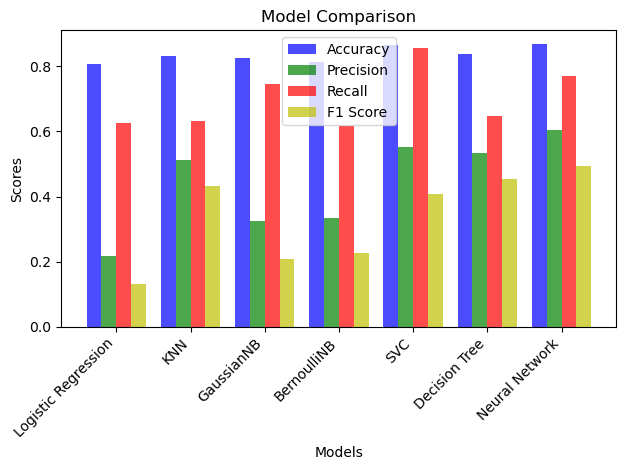

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
index = np.arange(len(name))

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the bars for each metric
plt.bar(index, accuracy, bar_width, label='Accuracy', color='b', alpha=0.7)
plt.bar(index + bar_width, precision, bar_width, label='Precision', color='g', alpha=0.7)
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', color='r', alpha=0.7)
plt.bar(index + 3 * bar_width, f1, bar_width, label='F1 Score', color='y', alpha=0.7)

# Set the x-axis labels
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(name, rotation=45, ha='right')

# Set the legend
plt.legend()

# Set the labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison')

# Show the plot
plt.tight_layout()
plt.show()


#### Testing a particular sample so that when a single sample comes as an input how model will predict the output.

In [60]:
scaler = joblib.load('scalerf.pkl')
churn_model = joblib.load('model_svc.pkl')
credit_score = 502
country = 0
gender = 0
age = 42
tenure = 8
balance = 159660.80
products_number = 3
credit_card = 1
active_member = 0
estimated_salary = 113931.57

cols_sc = [[credit_score,age,tenure,balance,products_number,estimated_salary]]
print(cols_sc)
scaled_cols = scaler.transform(cols_sc)
print(scaled_cols[0])
feature_vector = [[scaled_cols[0][0], country, gender, scaled_cols[0][1], scaled_cols[0][2], scaled_cols[0][3], scaled_cols[0][4], credit_card, active_member, scaled_cols[0][5]]]
print(feature_vector)


# Make predictions using the loaded model
prediction = churn_model.predict(feature_vector)

print(f"Churn Prediction: {prediction}")

[[502, 42, 8, 159660.8, 3, 113931.57]]
[-1.53679418  0.29351742  1.03035488  1.81979995  2.52705662  0.2406869 ]
[[-1.536794180222889, 0, 0, 0.2935174228967471, 1.0303548793281552, 1.8197999487823882, 2.52705661927622, 1, 0, 0.24068690006348814]]
Churn Prediction: [1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [61]:
# 502	0	0	42	8	159660.80	3	1	0	113931.57

# credit_score       -1.536794
# country             0.000000
# gender              0.000000
# age                 0.293517
# tenure              1.030355
# balance             1.819800
# products_number     2.527057
# credit_card         1.000000
# active_member       0.000000
# estimated_salary    0.240687
# churn               1.000000

In [62]:
# results['Algorithm'].append(name)
# results['Accuracy'].append(accuracy)
# results['F1 Score'].append(f1)
# results['Precision'].append(precision)
# results['Recall'].append(recall)